# Paper Figures

In [126]:
from iwander import *
%matplotlib nbagg

## Global definitions

In [127]:
BASE_DIR="../"
BD=BASE_DIR+"scratch/"
FIG_DIR="figures/"
WANDERER="Oumuamua"

from matplotlib.backends.backend_pdf import PdfPages

## Load Databases

In [128]:
astrorv=pd.read_csv(BASE_DIR+"db/src/AstroRV.csv")

/home/iwander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Load results

In [129]:
wobjs=pd.read_csv(BD+"wanderer-%s.csv"%WANDERER)
nominal=wobjs.iloc[0]
exec(open(BD+"ingress-%s.dat"%WANDERER).read())

## Figures

### Figure radiant

<IPython.core.display.Javascript object>


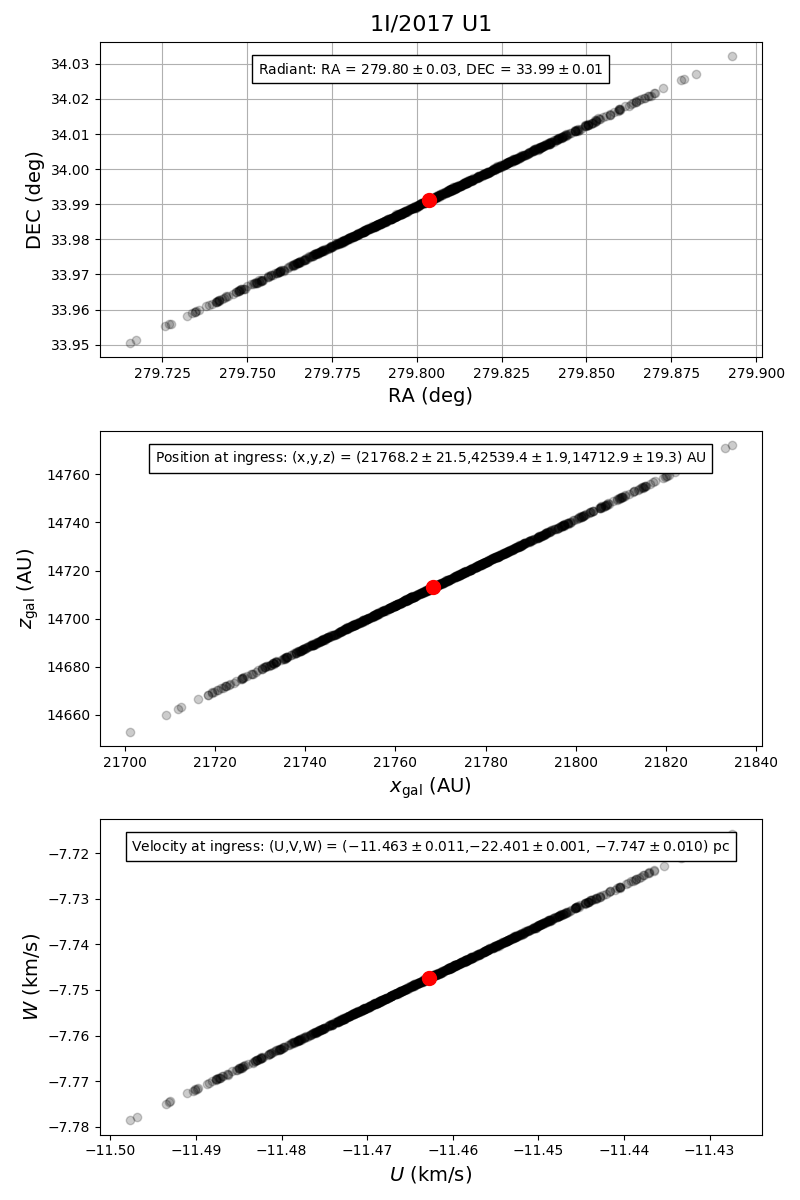

DEC =  33.9908749324 0.0131720987611
RA =  279.8030304 0.0286541901224
b =  17.113656944 0.0172479338254
l =  62.8999074443 0.0219594755915


In [4]:
#fig,axs=subPlots([1,1,1],dh=0.05,figsize=(8,4))
fig,axs=plt.subplots(3,1,figsize=(8,4*3))

dec_error=wobjs.DEC.std()
ra_error=wobjs.RA.std()
dec_mean=wobjs.DEC.mean()
ra_mean=wobjs.RA.mean()

b_error=wobjs.b.std()
l_error=wobjs.l.std()
b_mean=wobjs.b.mean()
l_mean=wobjs.l.mean()

print("DEC = ",dec_mean,dec_error)
print("RA = ",ra_mean,ra_error)

print("b = ",b_mean,b_error)
print("l = ",l_mean,l_error)

ax=axs[0]
ax.plot(wobjs.RA,wobjs.DEC,'ko',alpha=0.2)
ax.plot(wobjs.RA[0],wobjs.DEC[0],'ro',ms=10)

ax.set_xlabel("RA (deg)",fontsize=14)
ax.set_ylabel("DEC (deg)",fontsize=14)

ax.text(0.5,0.90,r"Radiant: RA = $%.2f\pm%.2f$, DEC = $%.2f\pm%.2f$"%(wobjs.RA[0],ra_error,
                                                                       wobjs.DEC[0],dec_error),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

ax.set_title('1I/2017 U1',position=(0.5,1.01),fontsize=16)
ax.grid()

ax=axs[1]
xecl=wobjs.xgal/AU;yecl=wobjs.ygal/AU;zecl=wobjs.zgal/AU;
dx=xecl.std();dy=yecl.std();dz=zecl.std();

ax.plot(xecl,zecl,'ko',alpha=0.2)
ax.plot(xecl[0],zecl[0],'ro',ms=10)
ax.set_xlabel(r'$x_{\rm gal}$ (AU)',fontsize=14)
ax.set_ylabel(r'$z_{\rm gal}$ (AU)',fontsize=14)

ax.text(0.5,0.90,r"Position at ingress: (x,y,z) = ($%.1f\pm%.1f$,$%.1f\pm%.1f$,$%.1f\pm%.1f$) AU"%(xecl[0],dx,yecl[0],dy,zecl[0],dz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

ax=axs[2]
vx=wobjs.vxgal;vy=wobjs.vygal;vz=wobjs.vzgal;
dvx=vx.std();dvy=vy.std();dvz=vz.std();


ax.plot(vx,vz,'ko',alpha=0.2)
ax.plot(vx[0],vz[0],'ro',ms=10)
ax.set_xlabel(r'$U$ (km/s)',fontsize=14)
ax.set_ylabel(r'$W$ (km/s)',fontsize=14)

ax.text(0.5,0.90,r"Velocity at ingress: (U,V,W) = ($%.3f\pm%.3f$,$%.3f\pm%.3f$, $%.3f\pm%.3f$) pc"%(vx[0],dvx,vy[0],dvy,vz[0],dvz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

fig.tight_layout()
fig.savefig(FIG_DIR+"wanderer-radiant-position.png")


In [6]:
# Calculate distances of the surrogate objects to the center of the cloud
center=np.array([wobjs.xgal.mean(),wobjs.ygal.mean(),wobjs.zgal.mean()])
ds=np.array([np.linalg.norm([wobjs.loc[ind].xgal-center[0],wobjs.loc[ind].ygal-center[1],wobjs.loc[ind].zgal-center[2]]) for ind in wobjs.index])

# Calculate relative velocities of surrogate objects to the center of the cloud
vcenter=np.array([wobjs.vxgal.mean(),wobjs.vygal.mean(),wobjs.vzgal.mean()])
vs=np.array([np.linalg.norm([wobjs.loc[ind].vxgal-vcenter[0],wobjs.loc[ind].vygal-vcenter[1],wobjs.loc[ind].vzgal-vcenter[2]]) for ind in wobjs.index])

In [10]:
# Calculate cloud expansion velocity
r90=np.percentile(ds,[90])[0]
v90=np.percentile(vs,[90])[0]

#Size properties
print("Cloud radius (r90) = ",r90/AU)
print("Cloud diameter (2*r90) = ",2*r90/AU)
print("Velocity radius (v90) = ",v90)
print("Expansion velocity (2*v90) = ",2*v90)

expansion_vel=2*v90
print("Expansion velocity = ",expansion_vel,2*r90/(t_ing*YEAR))
tret=2*PARSEC/expansion_vel/YEAR/1e6
print("Maximum retrospection time (Myrs) = ",tret)

#Velocity properties


Cloud radius (r90) =  48.9694661063
Cloud diameter (2*r90) =  97.9389322126
Velocity radius (v90) =  0.0257920067683
Expansion velocity (2*v90) =  0.0515840135366
Expansion velocity =  0.0515840135366 0.05162144835
Maximum retrospection time (Myrs) =  37.9112082228


## Thesholds

In [58]:
data=np.loadtxt(BD+"thresholds-Oumuamua.csv")

<IPython.core.display.Javascript object>


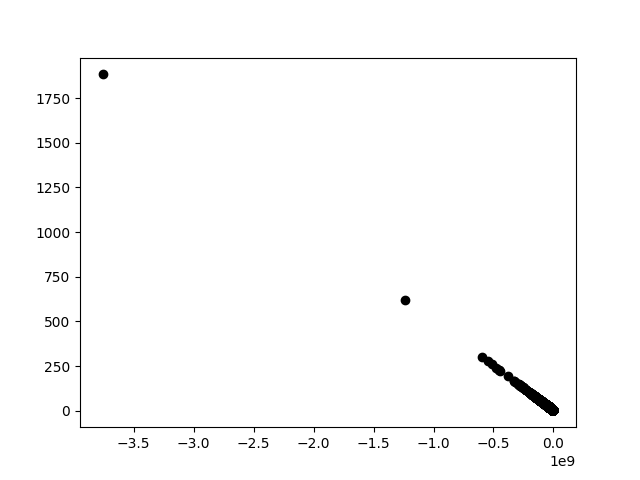

In [63]:
fig,axs=plt.subplots(1,1)
axs.plot(data[:,0],data[:,2],'ko')

## Stitching progenitors files

In [130]:
candidates=pd.read_csv(BD+"candidates-Oumuamua.csv")
len(candidates)

86398

In [140]:
datap=[]
for p in sorted(glob.glob(BD+"all/run*/progenitors-Oumuamua.csv.*")):
    data=pd.read_csv(p)
    datap+=[data]

In [149]:
enes=[]
for p in datap:
    p.dropna(subset=["source_id"], how="any", inplace=True)
    enes+=p[p.Pvelmed>0].source_id.values.tolist()

In [150]:
enes=np.unique(enes)
len(enes)

66344

In [152]:
#Save lacking candidates
lacking=candidates[~candidates.source_id.isin(enes)]
lacking.to_csv(BD+"candidates-Oumuamua.csv.lacking",index=False)
len(lacking)

20066